## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [ ]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [ ]:
#Menampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [ ]:
#Menampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [ ]:
#Menampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [ ]:
#Menampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [ ]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [ ]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [ ]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [ ]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [ ]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [ ]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
#filter data
filtered = df[
    (df['is_valid']== 1) &
    (df['category']== 'Mobiles & Tablets') &
    (df['order_date'].dt.year== 2022)
]

#Grouping 'filtered berdasarkan sku_name
#Hitung jumlah kuantitas penjualan (qty_ordered)
#Urutkan berdasarkan sum qty_ordered DESC
grouped = (
#Hitung jumlah kuantitas penjualan (qty_ordered)
    filtered.groupby('sku_name') ['qty_ordered']
    .sum()
    .reset_index()
    .sort_values(by='qty_ordered', ascending = False)
    .rename(columns={'sku_name' : 'produk',
            'qty_ordered' : 'kuantitas'}))
#Menampilkan 5 top product
top5_product = grouped.head()

print(top5_product)




                            produk  kuantitas
1               IDROID_BALRX7-Gold       1000
2         IDROID_BALRX7-Jet black          31
3               Infinix Hot 4-Gold         15
43  samsung_Grand Prime Plus-Black         11
34             infinix_Zero 4-Grey         10


## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [ ]:
#filter is_valid = 1 dan filter tanggal 2021 dan 2022 serta tampilkan hasil filter
df_filter=df[
    (df['is_valid']==1) &
    (df['years'].between(2021,2022))
]
print(df_filter)

                  id customer_id order_date   sku_id    price  qty_ordered  \
0     ODR9939707760w    C713589L 2021-11-19  P858068    26100          200   
3     ODR3378927994s    C830683L 2021-11-22  P540013  3593680            1   
4     ODR4904430099k    C191766L 2021-11-21  P491032  4413220            1   
6     ODR7610732813d    C313534L 2022-12-01  P849301  2697000            1   
7     ODR4415476736l    C215074L 2022-12-01  P918122  2533672            1   
...              ...         ...        ...      ...      ...          ...   
5877  ODR6864259419h    C714630L 2022-07-25  P194155        0            3   
5878  ODR8376183747r    C300950L 2022-07-28  P194155        0            1   
5879  ODR4312238651y    C295679L 2022-07-29  P194155        0            2   
5880  ODR3930118778w    C368658L 2022-09-06  P194155        0            1   
5882  ODR2809405363p    C790722L 2022-11-07  P194155        0            2   

      before_discount  discount_amount  after_discount  is_gros

In [ ]:
#mengelompokkan data berdasarkan kategori dan tahun
grouped = df_filter.groupby(['category', 'years'])['qty_ordered'].sum().reset_index()

#memisahkan data tahun 2021 dan 2022
df_2021 = grouped[grouped['years']==2021]
df_2022 = grouped[grouped['years']==2022]

#menggabungkan data 2021 dan 2022
df_merge = pd.merge(df_2021, df_2022, on='category',suffixes=('_2021', '_2022'))

#Menghitung selisih jumlah order 2021 vs 2022
df_merge['selisih'] = df_merge['qty_ordered_2022'] - df_merge['qty_ordered_2021']

#Memberi status naik, turun, atau tetap
df_merge['status'] = df_merge['selisih'].apply(lambda x: 'Naik' if x > 0 else ('Turun' if x < 0 else 'Tetap'))

#Mengurutkan berdasarkan selisih dari terbesar hingga terkecil
df_merge = df_merge.sort_values(by='selisih', ascending=False)
#Menampilkan 15 baris teratas
print(df_merge.head(15))

              category  years_2021  qty_ordered_2021  years_2022  \
9    Mobiles & Tablets        2021               107        2022   
14       Women Fashion        2021               140        2022   
13          Superstore        2021               327        2022   
4        Entertainment        2021                77        2022   
7          Kids & Baby        2021               170        2022   
6        Home & Living        2021               193        2022   
11  School & Education        2021               184        2022   
3            Computing        2021               109        2022   
5      Health & Sports        2021               173        2022   
0           Appliances        2021               124        2022   
2                Books        2021               171        2022   
1    Beauty & Grooming        2021               168        2022   
8          Men Fashion        2021               237        2022   
12             Soghaat        2021              

## `Jawaban No 2.2`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
#
df_filter2=df[
    (df['is_valid']==1) &
    (df['years'].between(2021,2022)) &
    (df['category'].str.lower()=='others')
]
print(df_filter2)

                  id customer_id order_date   sku_id   price  qty_ordered  \
0     ODR9939707760w    C713589L 2021-11-19  P858068   26100          200   
79    ODR5050363774l    C157544L 2022-06-16  P497470  522000            1   
125   ODR3678705048c    C157544L 2022-04-05  P753586  348000            1   
129   ODR8294249799k    C217289L 2022-06-15  P850836  116000            2   
130   ODR9190651304u    C607220L 2022-08-13  P711218  130500            1   
...              ...         ...        ...      ...     ...          ...   
5826  ODR2967500173q    C631413L 2021-12-09  P464743    7830            1   
5834  ODR9211138878s    C156505L 2021-09-07  P982256    6960            1   
5852  ODR8182513033k    C355357L 2022-05-13  P800680     638            1   
5853  ODR2206904426f    C794109L 2021-09-25  P587474     290            2   
5857  ODR1804543066s    C836000L 2022-06-28  P869522      58            1   

      before_discount  discount_amount  after_discount  is_gross  is_valid 

In [ ]:
#mengelompokkan data berdasarkan sku_name(nama produk) dan tahun
grouped = df_filter2.groupby(['sku_name', 'years'])['qty_ordered'].sum().reset_index()
#memisahkan data 2021 dan 2022
df_2021 = grouped[grouped['years']==2021]
df_2022 = grouped[grouped['years']==2022]
#Menggabungkan data 2021 dan 2022 berdasarkan sku_name
df_merge = pd.merge(df_2021, df_2022, on='sku_name',suffixes=('_2021', '_2022'))
#Menghitung selisih
df_merge['selisih'] = df_merge['qty_ordered_2022'] - df_merge['qty_ordered_2021']
#menentukan status
penurunan = df_merge[df_merge['selisih']<0]
#mengurutkan dari terkecil hingga terbesar
top_20_penurunan = penurunan.sort_values(by='selisih', ascending=True)
print(top_20_penurunan.head(20))

                                             sku_name  years_2021  \
7                       RB_Dettol Germ Busting Kit-bf        2021   
8                                 Telemall_MM-DR-HB-L        2021   
16                                    kansai_NeverWet        2021   
14                                         emart_00-1        2021   
5                                      MEGUIAR_G12711        2021   
0                                  Aladdin_bike_cover        2021   
9                                     Tmall_MM-DR-PAD        2021   
2   Entertainer Asia_Vouch 365-2017 Mobile App Lahore        2021   
11            aw_Ultra Shine Wash & Wax-64oz./1893ml         2021   

    qty_ordered_2021  years_2022  qty_ordered_2022  selisih  
7                200        2022                45     -155  
8                 23        2022                 2      -21  
16                10        2022                 1       -9  
14                 7        2022                 1       -6  

## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
#mengambil tahun dari order_date
df['years'] = df['order_date'].dt.year

#filter pelanggan yang belum membayar
df_filtered = df[
    (df['is_gross']==1)&
    (df['is_valid']==0)&
    (df['is_net']==0)&
    (df['order_date'].dt.year==2022)

]



In [ ]:
#Membuat variabel “result_df” untukn menampilkan data berdasarkan ‘customer_id’,  ‘registered_date’. Kemudian membuang data ‘customer_id’ yang sama
result_df = df_filtered[['customer_id', 'registered_date']]
result_df = result_df.drop_duplicates()
print(result_df)

     customer_id registered_date
9       C246762L      2022-05-08
18      C848774L      2021-11-07
19      C693415L      2022-04-12
21      C180595L      2022-04-22
22      C587425L      2022-03-22
...          ...             ...
5855    C653797L      2022-04-03
5856    C394076L      2021-10-12
5859    C248585L      2022-07-10
5865    C471304L      2022-05-13
5881    C265450L      2022-02-17

[820 rows x 2 columns]


In [ ]:
df.to_csv('audience_list.csv', encoding='utf-8-sig', index=False)

In [ ]:
#Jalankan kode ini untuk mendownload file
from google.colab import files
df.to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False) #ganti [nama variabel file] dengan nama variabel yang digunakan
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
print(df.columns)

Index(['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_ordered',
       'before_discount', 'discount_amount', 'after_discount', 'is_gross',
       'is_valid', 'is_net', 'payment_id', 'payment_method', 'sku_name',
       'base_price', 'cogs', 'category', 'registered_date', 'years', 'day',
       'month', 'month_number', 'day_type', 'total_sales'],
      dtype='object')


In [ ]:
df['day'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month
df['month_number'] = df['order_date'].dt.month
df['years'] = df['order_date'].dt.year
df['day_type'] = df['day'].apply(lambda x: 'weekend' if x in ['Saturday','Sunday'] else 'weekday')
df['total_sales'] = df['price'] * df['qty_ordered']
df.day_type

,day_type
0,weekday
1,weekday
2,weekday
3,weekday
4,weekend
...,...
5879,weekday
5880,weekday
5881,weekday
5882,weekday


In [ ]:
df_filter1 = df[
    (df['is_valid']==1) &
    (df['month_number'].isin([10,11,12])) &
    (df['years']==2022)
]

In [ ]:
df_result1 = (
    df_filter1.groupby(['order_date','month','day_type'])['total_sales']
    .sum()
    .reset_index()
)
print(df_result1)

   order_date  month day_type  total_sales
0  2022-10-01     10  weekend      7603220
1  2022-10-02     10  weekend      2233348
2  2022-10-03     10  weekday      5111076
3  2022-10-04     10  weekday     12259634
4  2022-10-05     10  weekday     10050704
5  2022-10-06     10  weekday      4050430
6  2022-10-07     10  weekday      7889218
7  2022-10-08     10  weekend      7288454
8  2022-11-01     11  weekday      8999106
9  2022-11-02     11  weekday       781782
10 2022-11-03     11  weekday      4296930
11 2022-11-04     11  weekday     11829274
12 2022-11-05     11  weekend      6545822
13 2022-11-06     11  weekend      5002268
14 2022-11-07     11  weekday      3706084
15 2022-11-08     11  weekday      7614820
16 2022-12-01     12  weekday      8811882
17 2022-12-02     12  weekday      2678962
18 2022-12-03     12  weekend      2121234
19 2022-12-04     12  weekend      6090754
20 2022-12-05     12  weekday      2699668
21 2022-12-06     12  weekday      9767606
22 2022-12-

In [ ]:
df_filtered = df[
    (df['order_date'].dt.year == 2022)&
    (df['order_date'].dt.month >= 10)&
    (df['order_date'].dt.month <= 12)&
    (df['is_valid']== 1)

]
df_result1_avg = (
    df_filtered
    .groupby(['month','day_type'])['total_sales']
    .mean()
    .reset_index()
    .rename(columns={'total_sales': 'df_result1_avg'})
)
pd.options.display.float_format = lambda x: '{:,.0f}'.format(x)
print(df_result1_avg.sort_values(by=['month','day_type']))

   month day_type  df_result1_avg
0     10  weekday         874,690
1     10  weekend         634,260
2     11  weekday         641,862
3     11  weekend         607,794
4     12  weekday         813,574
5     12  weekend         410,599


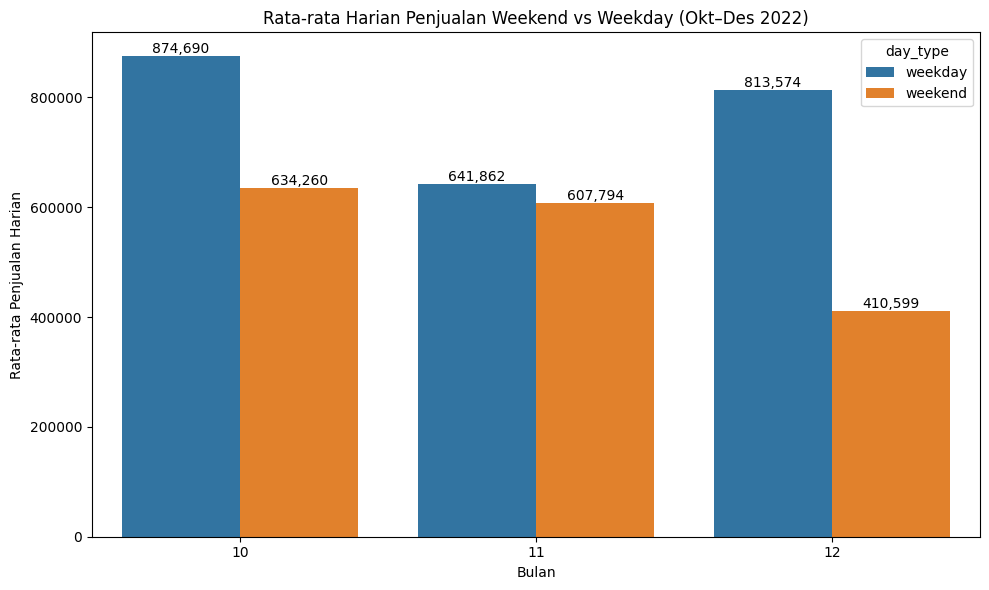

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_result1_avg, x='month', y='df_result1_avg', hue='day_type')
plt.title('Rata-rata Harian Penjualan Weekend vs Weekday (Okt–Des 2022)')
plt.ylabel('Rata-rata Penjualan Harian')
plt.xlabel('Bulan')

# Add data labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.tight_layout()
plt.show()

## `Jawaban No 4.2`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
df_filter1 = df[
    (df['is_valid']==1) &
    (df['month_number'].isin([10,11,12])) &
    (df['years']==2022)
]

In [ ]:
df_result1 = (
    df_filter1.groupby(['order_date','month','day_type'])['total_sales']
    .sum()
    .reset_index()
)
print(df_result1)

   order_date  month day_type  total_sales
0  2022-10-01     10  weekend      7603220
1  2022-10-02     10  weekend      2233348
2  2022-10-03     10  weekday      5111076
3  2022-10-04     10  weekday     12259634
4  2022-10-05     10  weekday     10050704
5  2022-10-06     10  weekday      4050430
6  2022-10-07     10  weekday      7889218
7  2022-10-08     10  weekend      7288454
8  2022-11-01     11  weekday      8999106
9  2022-11-02     11  weekday       781782
10 2022-11-03     11  weekday      4296930
11 2022-11-04     11  weekday     11829274
12 2022-11-05     11  weekend      6545822
13 2022-11-06     11  weekend      5002268
14 2022-11-07     11  weekday      3706084
15 2022-11-08     11  weekday      7614820
16 2022-12-01     12  weekday      8811882
17 2022-12-02     12  weekday      2678962
18 2022-12-03     12  weekend      2121234
19 2022-12-04     12  weekend      6090754
20 2022-12-05     12  weekday      2699668
21 2022-12-06     12  weekday      9767606
22 2022-12-

In [ ]:
avg_3month_sales = (
    df_filtered
    .groupby(['day_type'])['total_sales']
    .mean()
    .reset_index()
    .rename(columns={'total_sales': 'df_result1_avg3'})
)
print(avg_3month_sales)

  day_type  df_result1_avg3
0  weekday          770,146
1  weekend          558,865


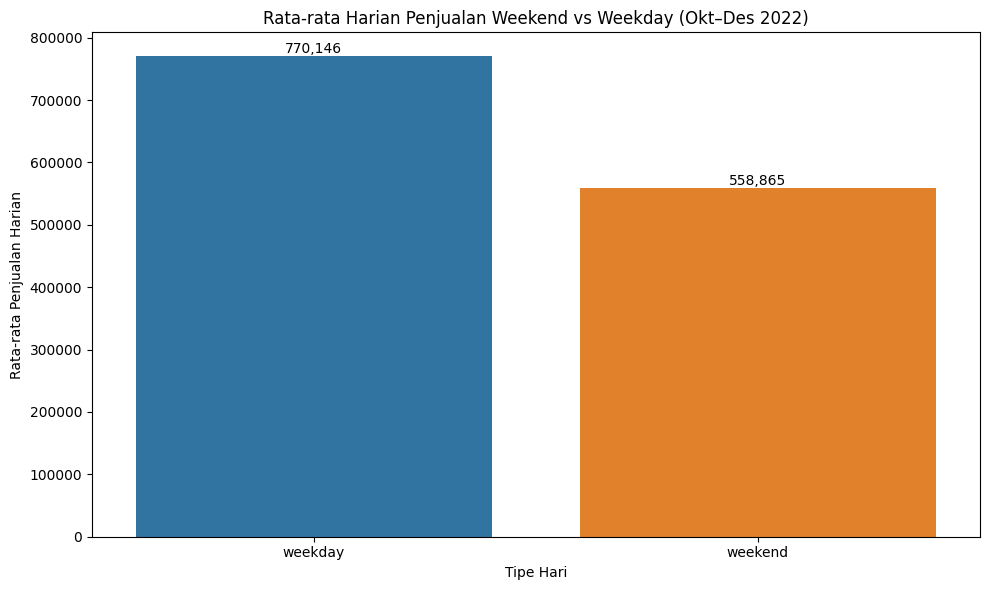

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=avg_3month_sales, x='day_type', y='df_result1_avg3', hue='day_type')
plt.title('Rata-rata Harian Penjualan Weekend vs Weekday (Okt–Des 2022)')
plt.ylabel('Rata-rata Penjualan Harian')
plt.xlabel('Tipe Hari')

# Add data labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}')

plt.tight_layout()
plt.show()